# Lead Scoring Case Study


## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#  Step 1: Reading and Understanding Dtaa

###   Importing Necessary Libraries

In [129]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [130]:
# Loading the data using Pandas
lead_score = pd.read_csv('Leads.csv')

###  Inspect the dataframe

In [131]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [132]:
lead_score.shape

(9240, 37)

In [133]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Quick check to see if the columns Lead Number and Prospect ID have unique values

In [134]:
#check for unique lead numbers and prospect id
sum(lead_score.duplicated(subset = 'Lead Number')) == 0


True

In [135]:
sum(lead_score.duplicated(subset = 'Prospect ID')) == 0

True

# Step 2 : Data Prepartion


### Data Cleaning & Treatment:

In [136]:
#dropping irrelevant columns which are not necessary for modelling lead rate.
lead_score.drop(['Prospect ID','Lead Number','A free copy of Mastering The Interview'], 1, inplace = True)

In [137]:
# Replacing 'select' with NaN (Since it means no option is selected)
lead_score = lead_score.replace('select',np.nan)

In [138]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_score = lead_score.replace('Select',np.nan)

In [139]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_score.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
What is your current occupation                     6
City                                                6
Lead Origin                                         5
Lead Quality                                        5
Lead Profile                                        5
Asymmetrique Profile Index                          3
What matters most to you in 

In [140]:
# Dropping one unique valued columns
lead_score1= lead_score.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [141]:
# Checking the percentage of missing values
round(100*(lead_score1.isnull().sum()/len(lead_score1.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Converted 

In [142]:
# Removing all the columns that are no required and have 35% null values
lead_score2 = lead_score1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Specialization'],axis=1)
lead_score2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified


In [143]:
# Rechecking the percentage of missing values
round(100*(lead_score2.isnull().sum()/len(lead_score2.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Lead Origi

- There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up while building the model, it will be of no use and we can drop it off then while doing analysis.

In [144]:
 
lead_score2['Country'] = lead_score2['Country'].fillna('not provided')
lead_score2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [145]:
# Rechecking the percentage of missing values
round(100*(lead_score2.isnull().sum()/len(lead_score2.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Lead Origi

In [146]:
lead_score2["Country"].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
Philippines                2
China                      2
Italy                      2
Bangladesh                 2
Belgium                    2
Uganda                     2
Ghana                      2
Vietnam                    1
Malaysia                   1
Liberia                    1
Indonesia                  1
Sri Lanka                  1
Kenya         

In [147]:
#one hot encoding should not be applied here as it creates too many variables which do not have high predictivepower. 
def slots(x):
    if x == "India":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_score2['Country'] = lead_score2.apply(lambda row:slots(row['Country']), axis = 1)
lead_score2['Country'].value_counts()



india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [148]:
# Rechecking the percentage of missing values
round(100*(lead_score2.isnull().sum()/len(lead_score2.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Country                                           0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Lead Origi

- Now, for columns having **below 30% missing values** - let's **impute maximum number of occurences** for a particluar column where missing values are found.

In [149]:
# TotalVisits column

lead_score2['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [150]:
lead_score2['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [151]:
lead_score2['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**Email Opened** is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [152]:
lead_score2['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Unemployed** is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [153]:
lead_score2['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Better Career Prospects** is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [154]:
# Now, imputing these values in our missing values dataset for respective categories

impute_missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

lead_score2=lead_score2.fillna(value=impute_missing_values)


In [155]:
lead_score2.isnull().sum()  # chekcing for missing values after imputing values to the missing area

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Last Notable Activity                            0
dtype: int64

In [156]:
lead_score2['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
blog                    1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

We found one column **'Lead Source'** is having same label name **'Google'** but in different format**('google')** so we need to make them in a same format hence using below commands.

In [157]:
# Applying lambda to captilize the first character of the column 'Lead Source'

lead_score2['Lead Source']=lead_score2['Lead Source'].apply(lambda x:x.capitalize() if x=="google" else x)
lead_score2['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
blog                    1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

# Data Transformation

Assigning numerical variables to categories with **'Yes' to 1 and 'No' to 0** or **converting binary variables (Yes/No) to (1/0)**

In [158]:
# Yes : 1 , No : 0
category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Do Not Email'
lead_score2['Do Not Email']=lead_score2['Do Not Email'].map(category)

# Column 'Do Not Call'
lead_score2['Do Not Call']=lead_score2['Do Not Call'].map(category)

# Column 'Search'
lead_score2['Search']=lead_score2['Search'].map(category)

# Column 'Newspaper Article'
lead_score2['Newspaper Article']=lead_score2['Newspaper Article'].map(category)

# Column 'X Education Forums'
lead_score2['X Education Forums']=lead_score2['X Education Forums'].map(category)

# Column 'Newspaper'
lead_score2['Newspaper']=lead_score2['Newspaper'].map(category)

# Column 'Digital Advertisement'
lead_score2['Digital Advertisement']=lead_score2['Digital Advertisement'].map(category)

# Column 'Through Recommendations'
lead_score2['Through Recommendations']=lead_score2['Through Recommendations'].map(category)


In [159]:
lead_score2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   Country                                        9240 non-null   

# EDA

## Visualizing numeric variables

In [160]:
# Converting some categories to numercial as they are imported as an 'Object'

lead_score2[['TotalVisits','Page Views Per Visit']]=lead_score2[['TotalVisits','Page Views Per Visit']].astype('float')
lead_score2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

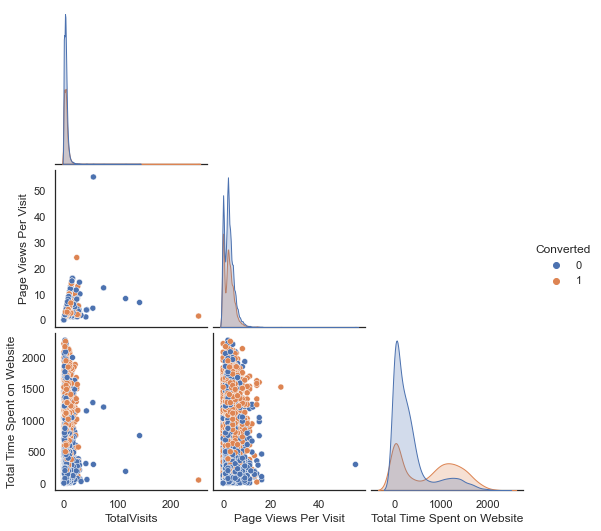

In [161]:
plot_cols = ['Converted','TotalVisits','Page Views Per Visit','Total Time Spent on Website']
sns.pairplot(lead_score2[plot_cols],hue='Converted',corner=True,diag_kind='kde')

plt.show()

## Visualising Categorical Variables

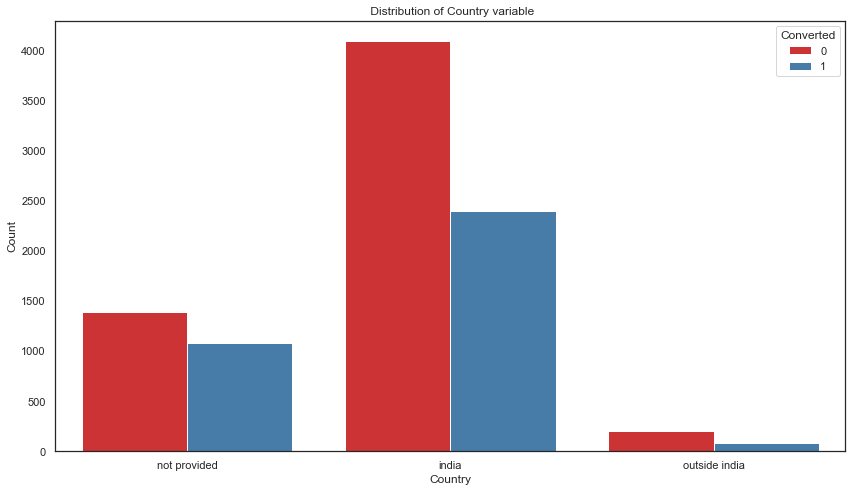

In [162]:
plt.figure(figsize=(12,7))
var='Country'
sns.countplot(x='Country',hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

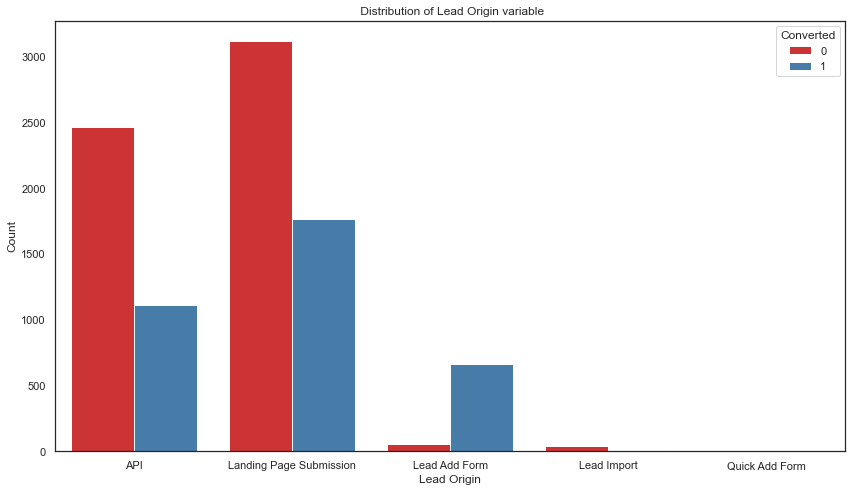

In [163]:
plt.figure(figsize=(12,7))
var='Lead Origin'
sns.countplot(x='Lead Origin',hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

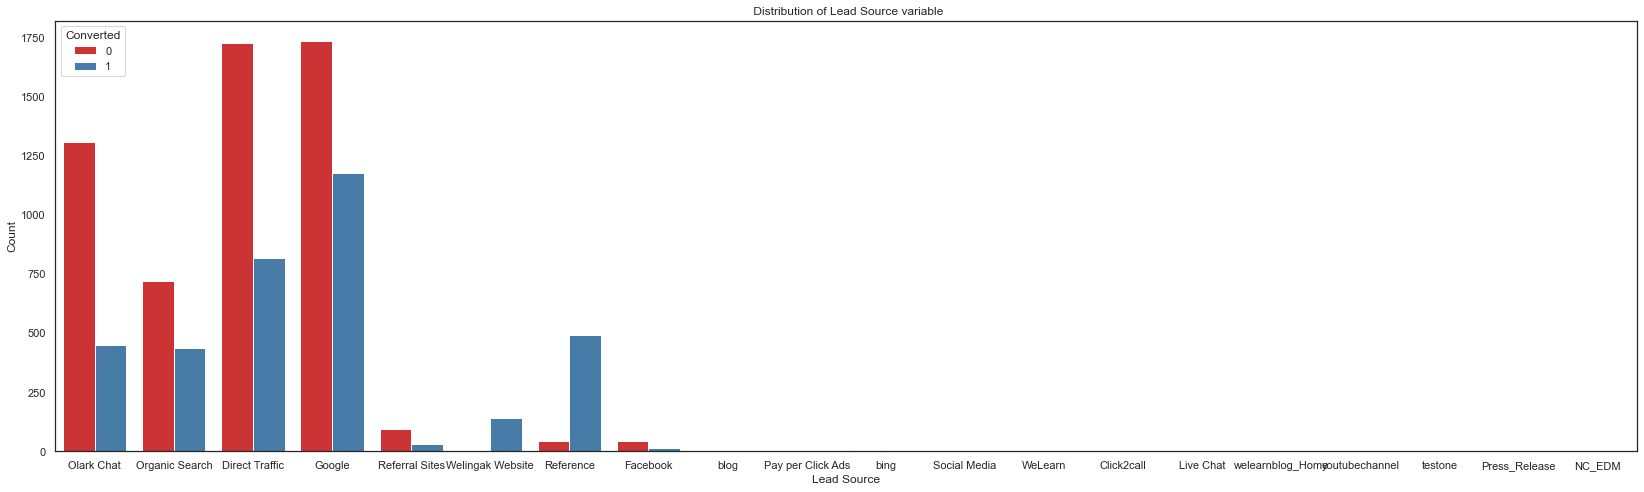

In [164]:
plt.figure(figsize=(23,7))

var ='Lead Source'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

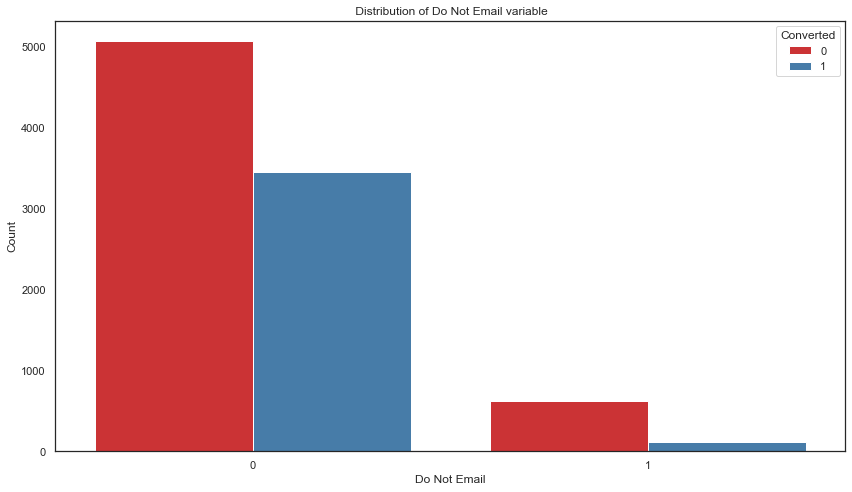

In [165]:
plt.figure(figsize=(12,7))

var ='Do Not Email'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

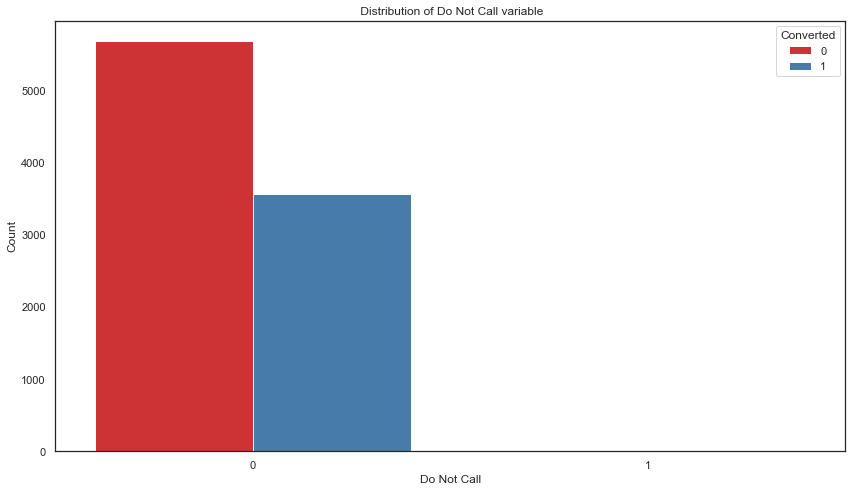

In [166]:
plt.figure(figsize=(12,7))

var ='Do Not Call'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

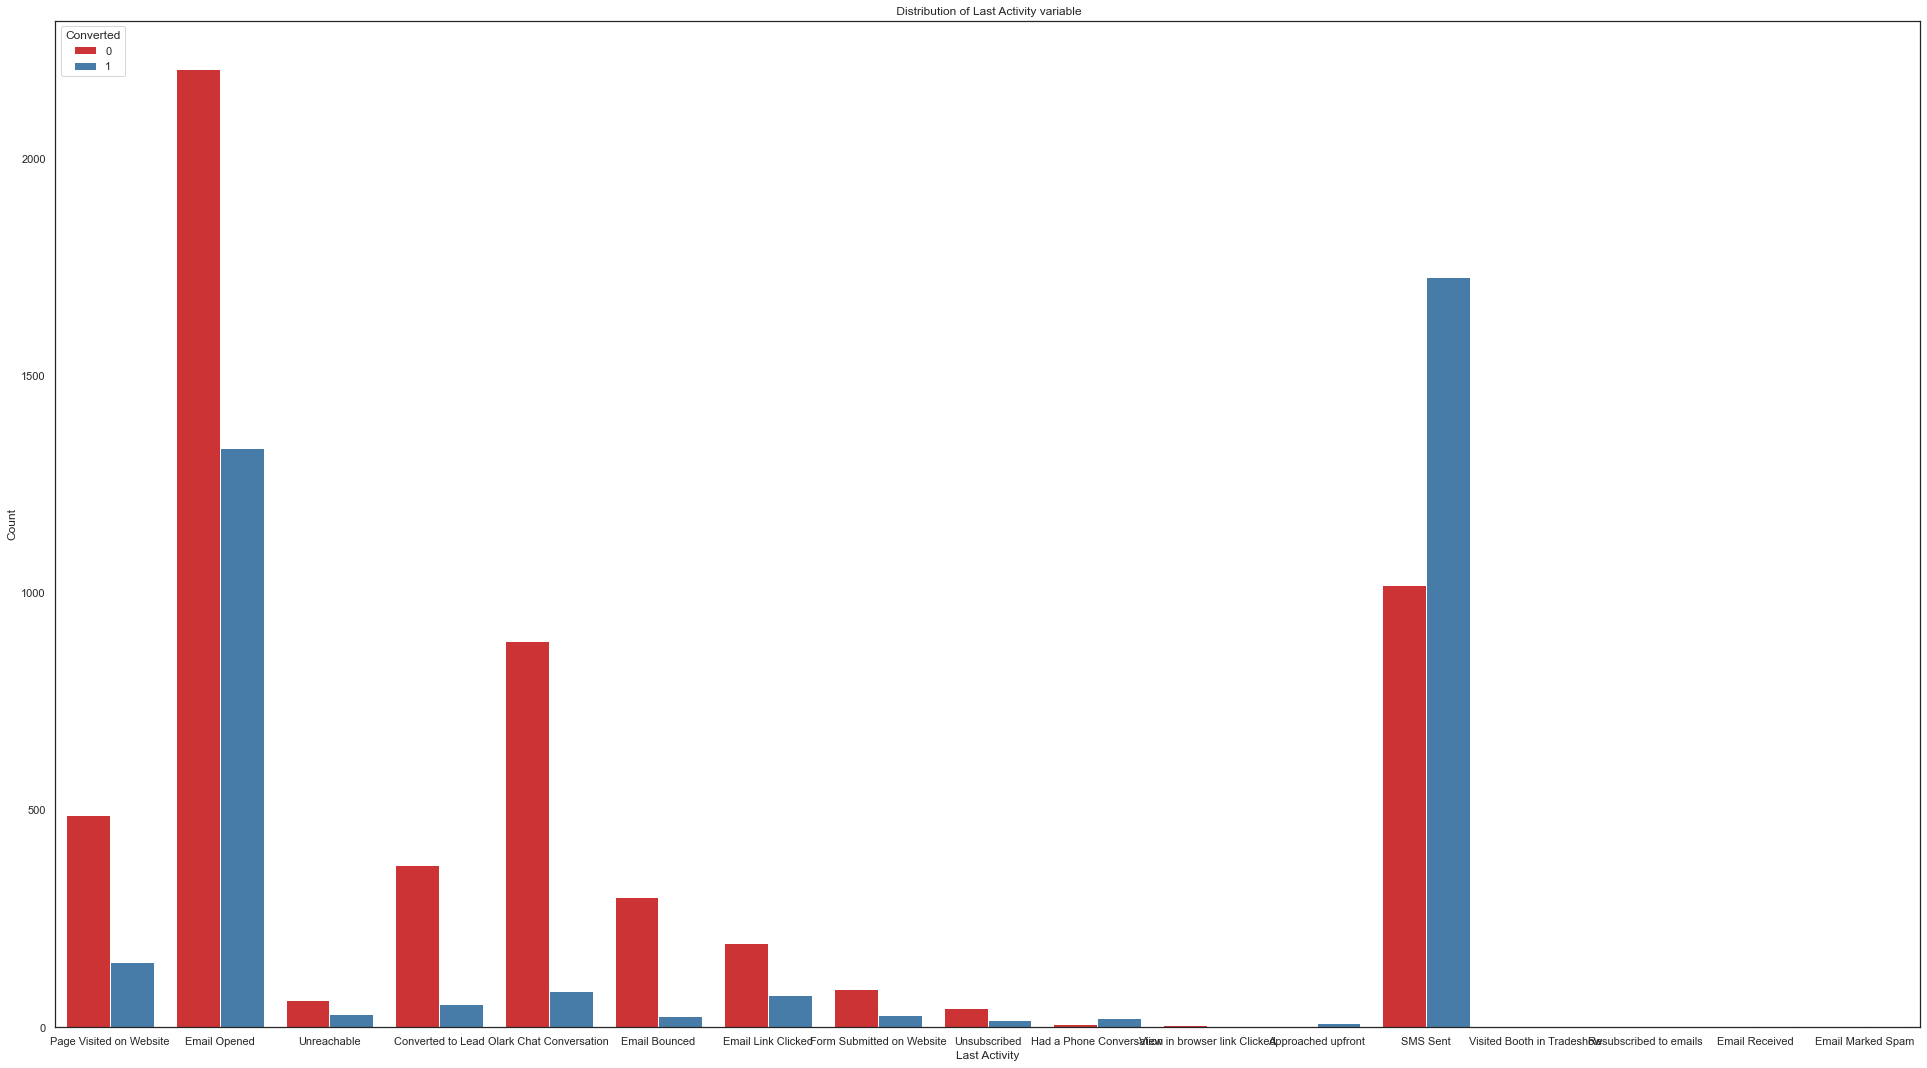

In [167]:
plt.figure(figsize=(27,15))

var ='Last Activity'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

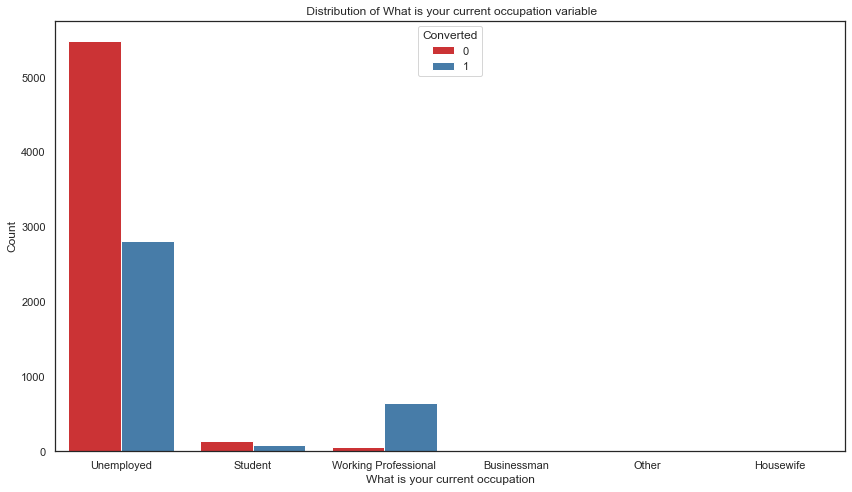

In [168]:
plt.figure(figsize=(12,7))

var ='What is your current occupation'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

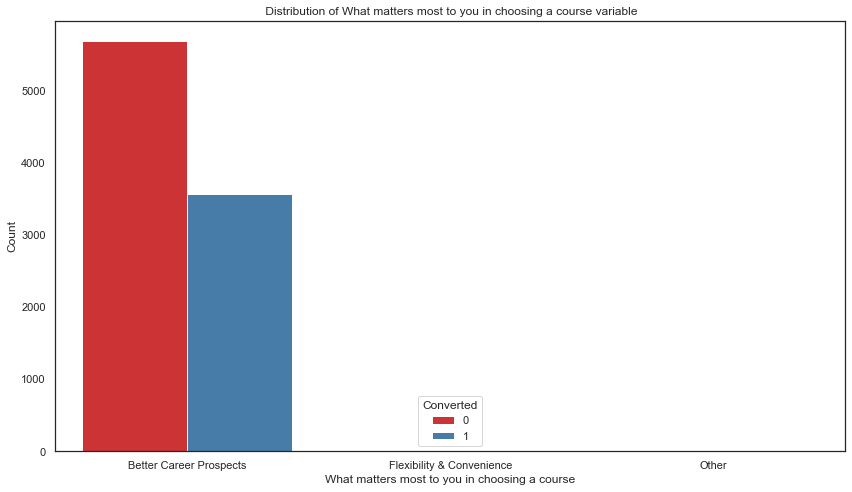

In [169]:
plt.figure(figsize=(12,7))

var = 'What matters most to you in choosing a course'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

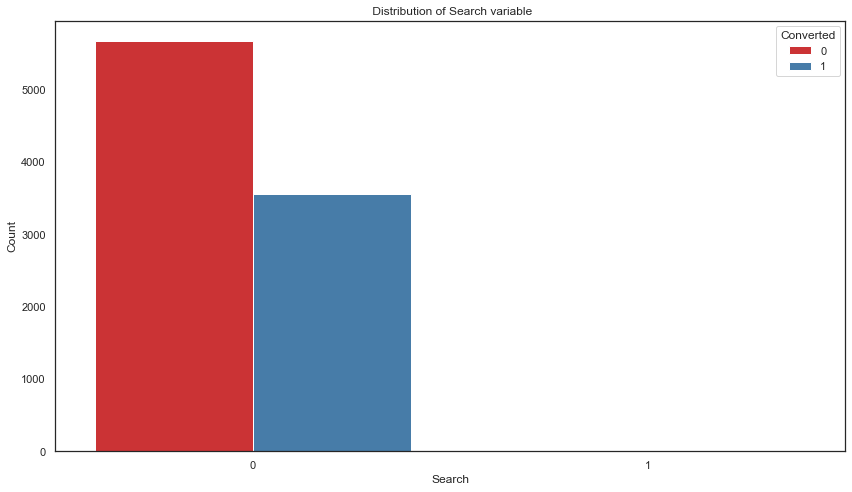

In [170]:
plt.figure(figsize=(12,7))

var = 'Search'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

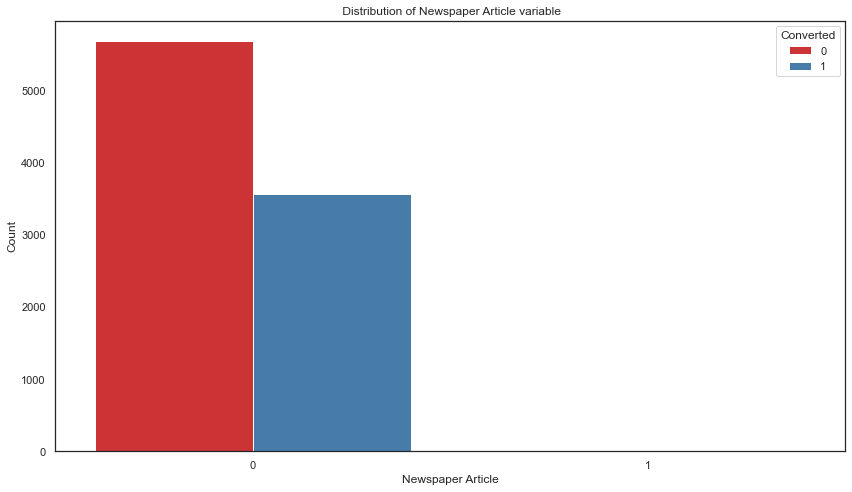

In [171]:
plt.figure(figsize=(12,7))

var = 'Newspaper Article'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

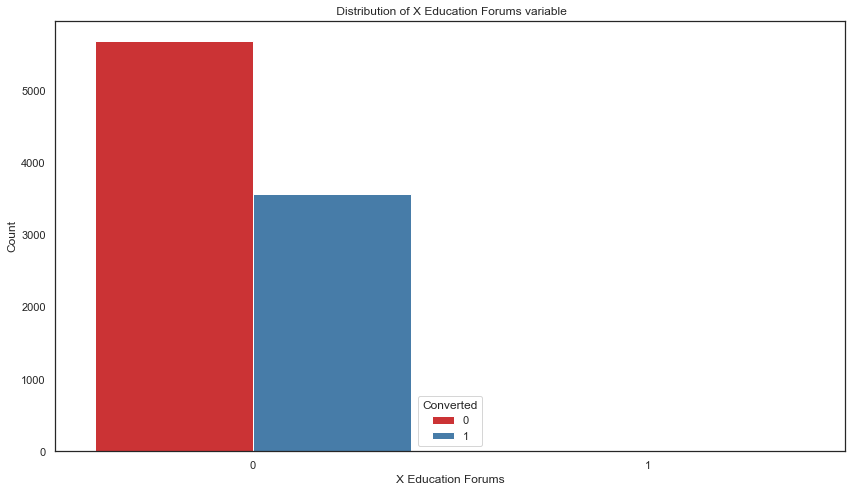

In [172]:
plt.figure(figsize=(12,7))

var = 'X Education Forums'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

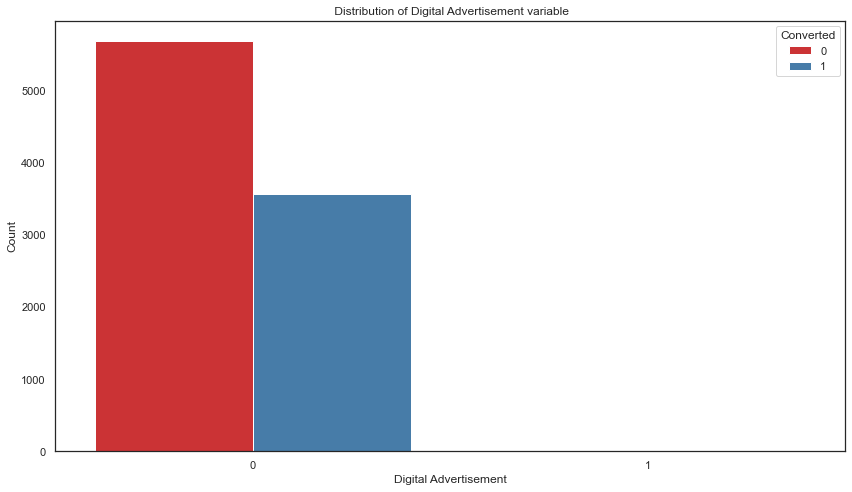

In [173]:
plt.figure(figsize=(12,7))

var = 'Digital Advertisement'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

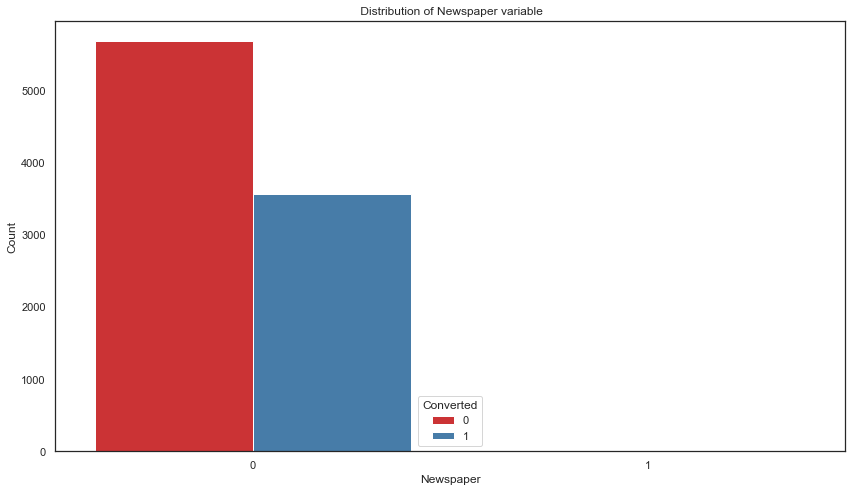

In [174]:
plt.figure(figsize=(12,7))

var = 'Newspaper'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

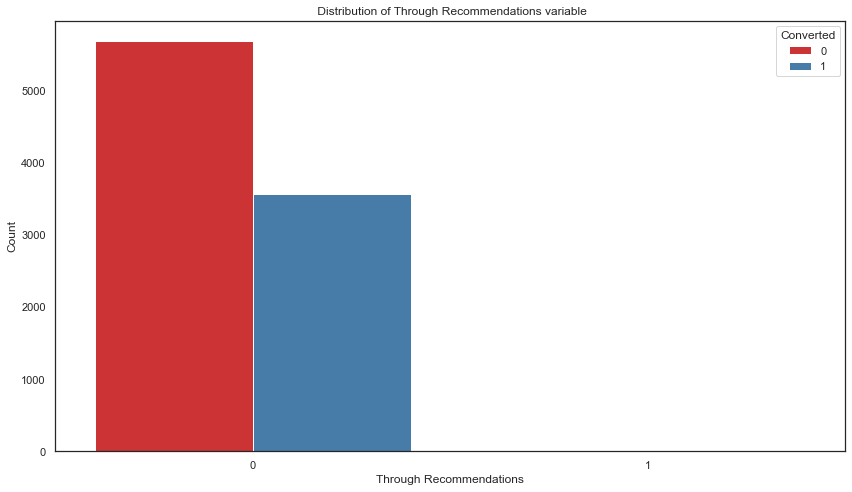

In [175]:
plt.figure(figsize=(12,7))

var = 'Through Recommendations'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

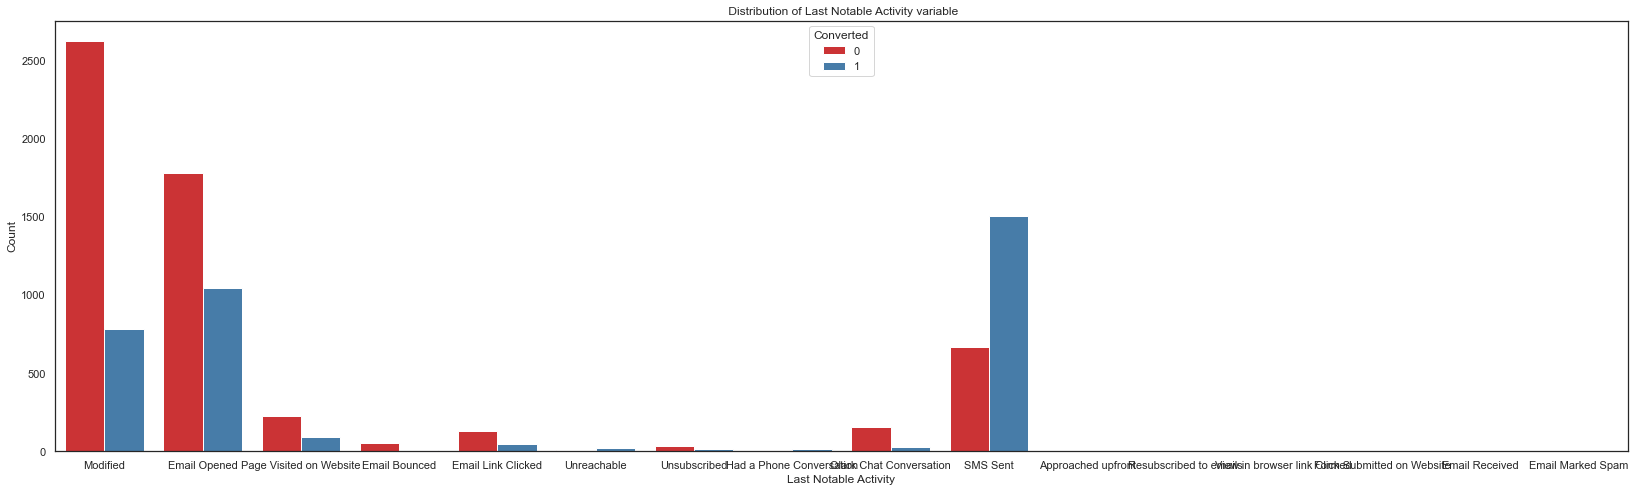

In [176]:
plt.figure(figsize=(23,7))

var = 'Last Notable Activity'
sns.countplot(x=var,hue='Converted',data=lead_score2, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

After converting the binary categories from 'Yes' to 1 and 'No' to 0 and Visuvalization **we will use now dummy variables for mutiple levels of categories.**

In [177]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy_col=pd.get_dummies(lead_score2[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity','Country']],drop_first=True)

# Adding these dummies to our original dataset

lead_score2=pd.concat([lead_score2,dummy_col],axis=1)
lead_score2.shape

(9240, 82)

**From above it states that all numerical variables are numericals**

## Checking for Outliers

In [178]:
numeric_col_outliers = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [179]:
round(lead_score2[numeric_col_outliers].describe(percentiles=[0.15,0.25,0.35,0.55,0.75,0.95]),2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00
mean,3.39,487.70,2.33
std,4.84,548.02,2.16
min,0.00,0.00,0.00
15%,0.00,0.00,0.00
25%,0.00,12.00,0.00
35%,2.00,98.00,1.50
50%,3.00,248.00,2.00
55%,3.00,305.00,2.00
75%,5.00,936.00,3.00


In [180]:
# numeric_col_outliers = list(lead_score2.select_dtypes(include='number').columns)
# len(numeric_col_outliers)

In [181]:
Q1 = lead_score2[numeric_col_outliers].quantile(0.25)
Q3 = lead_score2[numeric_col_outliers].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

outlier_count = ((lead_score2[numeric_col_outliers] < (Q1 - 1.5 * IQR)) | (lead_score2[numeric_col_outliers] > (Q3 + 1.5 * IQR))).sum()
print(outlier_count)

TotalVisits                    222
Total Time Spent on Website      0
Page Views Per Visit           209
dtype: int64


In [182]:
print(lowerwhisker)

TotalVisits                      -7.5
Total Time Spent on Website   -1374.0
Page Views Per Visit             -4.5
dtype: float64


In [183]:
print(upperwhisker)

TotalVisits                      12.5
Total Time Spent on Website    2322.0
Page Views Per Visit              7.5
dtype: float64


<Figure size 1008x504 with 0 Axes>

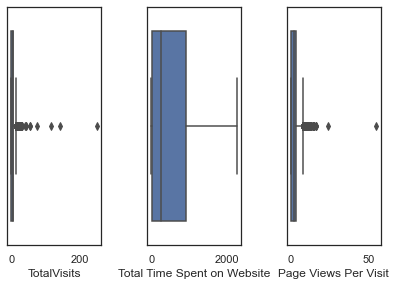

In [184]:
plt.figure(figsize=[14,7])
fig , axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True)                 # Plot Configuration 
#fig.subplots_adjust(left= 1, bottom=0, right=3, top=4, wspace=0.09, hspace=0.3)
plt.tight_layout()
sns.set_theme(style="white")

for ax, column in zip(axes.flatten(),numeric_col_outliers):        #Using For loop 
    sns.boxplot(lead_score2[column],ax=ax,orient="v")   #Ploting 

From the above boxplots we can now confirm that we have two outlier variables in our dataset **('TotalVisits' and 'Page Views Per Visit')**. Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will **create bins** for these two outliers.

### Creating bins

In [185]:
lead_score2['TotalVisits_bin'] = pd.qcut(lead_score2['TotalVisits'], q=[.2, .4, .6, .8, 1],labels=['Visits_bin1', 'Visits_bin2', 'Visits_bin3','Visits_bin4'])
lead_score2['TotalVisits_bin'].value_counts()


Visits_bin1    4401
Visits_bin3    1903
Visits_bin4    1630
Visits_bin2    1306
Name: TotalVisits_bin, dtype: int64

In [186]:
lead_score2['Page Views Per Visit_bin'] = pd.qcut(lead_score2['Page Views Per Visit'], q=[.2, .4, .6, .8, 1],labels=['Viewpervisit_bin1', 'Viewpervisit_bin2', 'Viewpervisit_bin3','Viewpervisit_bin4'])
lead_score2['Page Views Per Visit_bin'].value_counts()


Viewpervisit_bin1    5333
Viewpervisit_bin3    2344
Viewpervisit_bin4    1211
Viewpervisit_bin2     352
Name: Page Views Per Visit_bin, dtype: int64

In [187]:
lead_score2.drop(['TotalVisits','Page Views Per Visit'],axis=1, inplace=True)

In [188]:
# Creating a dummy variables for 4 categories and dropping the first level.
dummy_col_1=pd.get_dummies(lead_score2[['TotalVisits_bin','Page Views Per Visit_bin']], prefix=None,drop_first=True)

# Adding these dummies to our original dataset
lead_score2=pd.concat([lead_score2,dummy_col_1],axis=1)
lead_score2.shape

(9240, 88)

In [189]:
lead_score2.drop(['TotalVisits_bin','Page Views Per Visit_bin','Lead Origin','Lead Source','Country','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity'],axis=1, inplace=True)
lead_score2.shape

(9240, 79)

## Step 3: Splitting the Data into Training and Testing Sets

As you know, the first basic step for modelling is performing a train-test split.

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
y=lead_score2['Converted']     # putting target varaible 'Converted' to a new series 'y'

In [192]:
# Putting dependent variable in a new dataset called 'X'
X=lead_score2.drop('Converted',1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_not provided,Country_outside india,TotalVisits_bin_Visits_bin2,TotalVisits_bin_Visits_bin3,TotalVisits_bin_Visits_bin4,Page Views Per Visit_bin_Viewpervisit_bin2,Page Views Per Visit_bin_Viewpervisit_bin3,Page Views Per Visit_bin_Viewpervisit_bin4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [193]:
lead_score2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   Converted                                                                9240 non-null   int64
 3   Total Time Spent on Website                                              9240 non-null   int64
 4   Search                                                                   9240 non-null   int64
 5   Newspaper Article                                                        9240 non-null   int64
 6   X Education Forums                                                       9240 non-null  

In [194]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [195]:
X_alt_model  = X.copy()
y_alt_model = y.copy()

# Step 4: Scaling the train dataset

In [196]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  # Creating an object

In [197]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset
# As we have done the outlier treatment we can go for standardisation for scaling
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_not provided,Country_outside india,TotalVisits_bin_Visits_bin2,TotalVisits_bin_Visits_bin3,TotalVisits_bin_Visits_bin4,Page Views Per Visit_bin_Viewpervisit_bin2,Page Views Per Visit_bin_Viewpervisit_bin3,Page Views Per Visit_bin_Viewpervisit_bin4
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [198]:
## Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Correlation Analysis

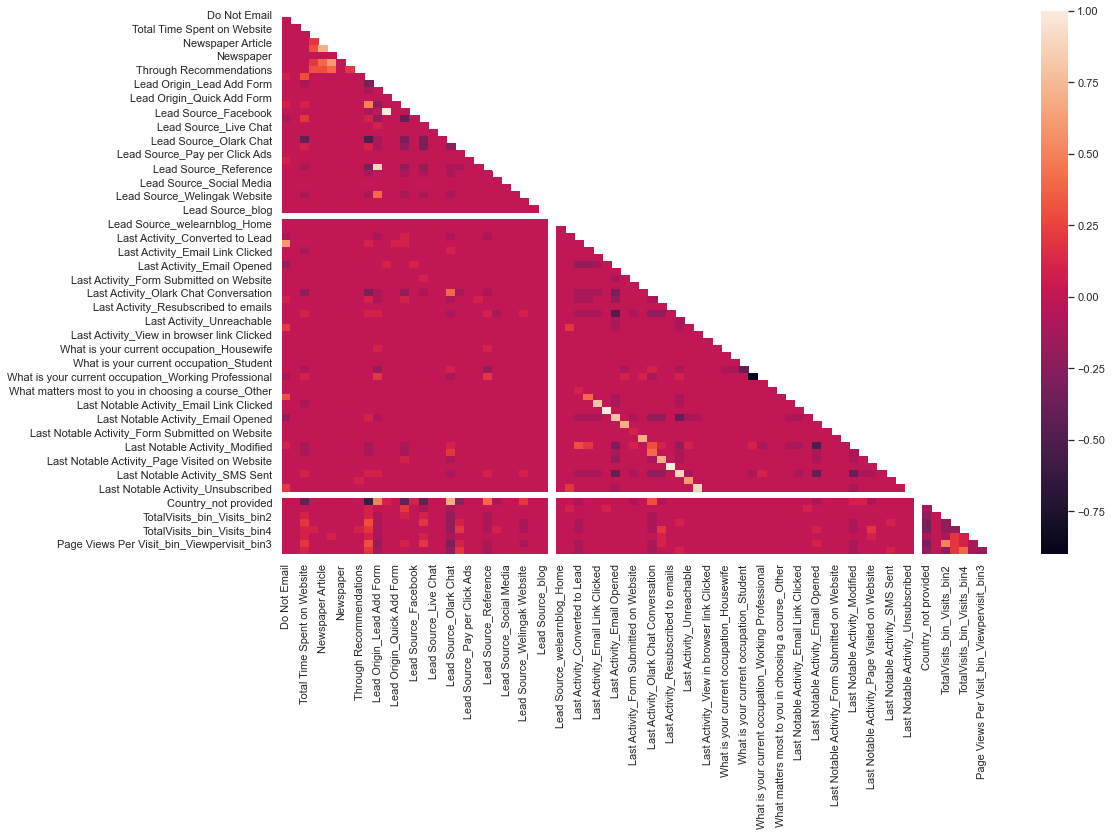

In [199]:
X_train.corr() #It creates a matrix or dataframe with correlations of particular columns with other variables
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
sns.heatmap(round(X_train.corr(), 1), annot=False,mask=mask)
plt.show()

# Step 5: Building a logistic regression model

In [200]:
# importing necessary library
import statsmodels.api as sm

In [201]:
lr=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6394
Model Family:                Gaussian   Df Model:                           73
Link Function:               identity   Scale:                         0.13623
Method:                          IRLS   Log-Likelihood:                -2693.7
Date:                Sat, 12 Jun 2021   Deviance:                       871.03
Time:                        23:40:51   Pearson chi2:                     871.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.7312      0.288      2.536      0.011       0.166       1.296
Do Not Email                                                               -0.1230      0.024     -5.053      0.000      -0.171      -0.075
Do Not Call                                                                 0.4602      0.262      1.759      0.079      -0.053       0.973
Total Time Spent on Website                                                 0.1831      0.005     34.814      0.000       0.173       0.193
Search                                                                      0.0694      0.122      0.571      0.568      -0.169       0.308
Newspaper Article                                                           0.6162      0.370      1.666      0.096      -0.109       1.341
X Education Forums                                                         -0.7096      0.610     -1.163      0.245      -1.906       0.487
Newspaper                                                                  -0.7424      0.370     -2.008      0.045      -1.467      -0.018
Digital Advertisement                                                      -0.4017      0.261     -1.536      0.124      -0.914       0.111
Through Recommendations                                                     0.1102      0.157      0.701      0.483      -0.198       0.418
Lead Origin_Landing Page Submission                                        -0.0325      0.014     -2.281      0.023      -0.060      -0.005
Lead Origin_Lead Add Form                                                   0.4368      0.077      5.660      0.000       0.286       0.588
Lead Origin_Lead Import                                                     0.1291      0.266      0.485      0.628      -0.393       0.651
Lead Origin_Quick Add Form                                                  0.2818      0.372      0.757      0.449      -0.448       1.011
Lead Source_Direct Traffic                                                 -0.0205      0.225     -0.091      0.927      -0.462       0.421
Lead Source_Facebook                                                       -0.2009      0.347     -0.579      0.562      -0.881       0.479
Lead Source_Google                                                          0.0254      0.225      0.113      0.910      -0.415       0.466
Lead Source_Live Chat                                                       0.1500      0.337      0.445      0.656      -0.511       0.811
Lead Source_NC_EDM                                                          0.4970      0.433      1.149      0.251      -0.351       1.345
Lea

### RFE Approach for Feature Selection

In [202]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr=LogisticRegression()                 # creating an object

In [203]:
# Running rfe for 20 variables

rfem = RFE(lr,20)
rfem = rfem.fit(X_train,y_train)   # fitting 

In [204]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [205]:
list(zip(X_train.columns,rfem.support_,rfem.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 34),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 36),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 23),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', False, 43),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 48),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 28),


In [206]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=X_train.columns[rfem.support_]
X_train_col=X_train[col]
X_train_1=sm.add_constant(X_train_col)    # Adding constant

### Model 1

In [207]:
# creating 1st model after RFE

lr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=lr1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.5
Date:                Sat, 12 Jun 2021   Deviance:                       5373.0
Time:                        23:41:02   Pearson chi2:                 7.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0939      0.068      1.377      0.169      -0.040       0.228
Do Not Email                                            -1.2965      0.195     -6.661      0.000      -1.678      -0.915
Total Time Spent on Website                              1.0999      0.040     27.624      0.000       1.022       1.178
Newspaper                                              -24.0252   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -21.9891   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Lead Origin_Lead Add Form                                2.6291      0.198     13.299      0.000       2.242       3.017
Lead Source_Facebook                                    -1.0969      0.518     -2.118      0.034      -2.112      -0.082
Lead Source_Welingak Website                             1.9737      0.743      2.655      0.008       0.517       3.431
Last Activity_Converted to Lead                         -1.0787      0.226     -4.776      0.000      -1.521      -0.636
Last Activity_Email Bounced                             -1.1974      0.351     -3.416      0.001      -1.884      -0.510
Last Activity_Had a Phone Conversation                   0.5831      0.951      0.613      0.540      -1.281       2.447
Last Activity_Olark Chat Conversation                   -1.2118      0.193     -6.266      0.000      -1.591      -0.833
What is your current occupation_Housewife               22.9520   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
What is your current occupation_Working Professional     2.7766      0.188     14.776      0.000       2.408       3.145
Last Notable Activity_Email Link Clicked                -1.8976      0.272     -6.966      0.000      -2.432      -1.364
Last Notable Activity_Email Opened                      -1.3077      0.087    -15.095      0.000      -1.477      -1.138
Last Notable Activity_Had a Phone Conversation           1.5479      1.453      1.065      0.287      -1.300       4.396
Last Notable Activity_Modified                          -1.6730      0.099    -16.816      0.000      -1.868      -1.478
Last Notable Activity_Olark Chat Conversation           -1.3467      0.366     -3.679      0.000      -2.064      -0.629
Last Notable Activity_Page Visited on Website           -1.5664      0.192     -8.164      0.000      -1.942      -1.190
Country_not provided                                     1.1140      0.104     10.740      0.000       0.911       1.317
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


### Calculating VIF

In [208]:
# importing VIFs library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [209]:
vif = pd.DataFrame()
X= X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
19,Country_not provided,2.37
9,Last Activity_Had a Phone Conversation,2.03
15,Last Notable Activity_Had a Phone Conversation,2.01
10,Last Activity_Olark Chat Conversation,1.99
16,Last Notable Activity_Modified,1.94
4,Lead Origin_Lead Add Form,1.84
0,Do Not Email,1.81
8,Last Activity_Email Bounced,1.80
17,Last Notable Activity_Olark Chat Conversation,1.32
6,Lead Source_Welingak Website,1.24


In [210]:
#COLUMN Country_not provided HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_2=X_train_col.drop(['Country_not provided'],axis=1)

### Model 2

In [211]:
# creating 2nd model after RFE

lr2=sm.GLM(y_train,sm.add_constant(X_train_2),family=sm.families.Binomial())
reg2=lr2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.3
Date:                Sat, 12 Jun 2021   Deviance:                       5486.7
Time:                        23:41:03   Pearson chi2:                 7.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2940      0.065      4.538      0.000       0.167       0.421
Do Not Email                                            -1.3301      0.190     -6.994      0.000      -1.703      -0.957
Total Time Spent on Website                              0.9269      0.035     26.675      0.000       0.859       0.995
Newspaper                                              -23.8161   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -22.2208   2.74e+04     -0.001      0.999   -5.38e+04    5.37e+04
Lead Origin_Lead Add Form                                3.3785      0.186     18.133      0.000       3.013       3.744
Lead Source_Facebook                                    -0.2764      0.500     -0.552      0.581      -1.257       0.704
Lead Source_Welingak Website                             1.9639      0.743      2.643      0.008       0.507       3.420
Last Activity_Converted to Lead                         -1.1635      0.221     -5.267      0.000      -1.597      -0.731
Last Activity_Email Bounced                             -1.0308      0.336     -3.065      0.002      -1.690      -0.372
Last Activity_Had a Phone Conversation                   0.5620      0.927      0.606      0.544      -1.255       2.379
Last Activity_Olark Chat Conversation                   -0.7972      0.191     -4.171      0.000      -1.172      -0.423
What is your current occupation_Housewife               22.7247    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
What is your current occupation_Working Professional     2.7510      0.187     14.722      0.000       2.385       3.117
Last Notable Activity_Email Link Clicked                -1.7598      0.274     -6.419      0.000      -2.297      -1.222
Last Notable Activity_Email Opened                      -1.2965      0.086    -15.153      0.000      -1.464      -1.129
Last Notable Activity_Had a Phone Conversation           1.3004      1.432      0.908      0.364      -1.507       4.107
Last Notable Activity_Modified                          -1.6658      0.098    -17.008      0.000      -1.858      -1.474
Last Notable Activity_Olark Chat Conversation           -1.3212      0.370     -3.574      0.000      -2.046      -0.597
Last Notable Activity_Page Visited on Website           -1.6081      0.187     -8.604      0.000      -1.974      -1.242
========================================================================================================================
"""

In [212]:
vif = pd.DataFrame()
X= X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
9,Last Activity_Had a Phone Conversation,2.03
15,Last Notable Activity_Had a Phone Conversation,2.01
16,Last Notable Activity_Modified,1.88
0,Do Not Email,1.81
8,Last Activity_Email Bounced,1.80
10,Last Activity_Olark Chat Conversation,1.79
4,Lead Origin_Lead Add Form,1.41
17,Last Notable Activity_Olark Chat Conversation,1.32
6,Lead Source_Welingak Website,1.24
7,Last Activity_Converted to Lead,1.23


In [213]:
#COLUMN Last Activity_Had a Phone Conversation HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_3=X_train_2.drop(['Last Activity_Had a Phone Conversation'],axis=1)

### Model 3

In [214]:
# creating 3rd model after RFE

lr3=sm.GLM(y_train,sm.add_constant(X_train_3),family=sm.families.Binomial())
reg3=lr3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.5
Date:                Sat, 12 Jun 2021   Deviance:                       5487.0
Time:                        23:41:03   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2940      0.065      4.536      0.000       0.167       0.421
Do Not Email                                            -1.3303      0.190     -6.994      0.000      -1.703      -0.957
Total Time Spent on Website                              0.9274      0.035     26.693      0.000       0.859       0.995
Newspaper                                              -23.8170   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -22.2215   2.74e+04     -0.001      0.999   -5.38e+04    5.38e+04
Lead Origin_Lead Add Form                                3.3806      0.186     18.147      0.000       3.016       3.746
Lead Source_Facebook                                    -0.2782      0.500     -0.556      0.578      -1.259       0.703
Lead Source_Welingak Website                             1.9609      0.743      2.639      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1675      0.221     -5.286      0.000      -1.600      -0.735
Last Activity_Email Bounced                             -1.0335      0.336     -3.073      0.002      -1.693      -0.374
Last Activity_Olark Chat Conversation                   -0.8006      0.191     -4.191      0.000      -1.175      -0.426
What is your current occupation_Housewife               22.7230    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
What is your current occupation_Working Professional     2.7535      0.187     14.742      0.000       2.387       3.120
Last Notable Activity_Email Link Clicked                -1.7599      0.274     -6.418      0.000      -2.297      -1.222
Last Notable Activity_Email Opened                      -1.2966      0.086    -15.153      0.000      -1.464      -1.129
Last Notable Activity_Had a Phone Conversation           1.8626      1.091      1.707      0.088      -0.276       4.001
Last Notable Activity_Modified                          -1.6623      0.098    -17.005      0.000      -1.854      -1.471
Last Notable Activity_Olark Chat Conversation           -1.3179      0.370     -3.565      0.000      -2.042      -0.593
Last Notable Activity_Page Visited on Website           -1.6083      0.187     -8.604      0.000      -1.975      -1.242
========================================================================================================================
"""

In [215]:
vif = pd.DataFrame()
X= X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,1.87
0,Do Not Email,1.81
8,Last Activity_Email Bounced,1.79
9,Last Activity_Olark Chat Conversation,1.79
4,Lead Origin_Lead Add Form,1.41
16,Last Notable Activity_Olark Chat Conversation,1.32
6,Lead Source_Welingak Website,1.24
7,Last Activity_Converted to Lead,1.23
11,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


In [216]:
#COLUMN Newspaper HAS A VERY HIGH P-VALUE SO WE NEED TO DROP IT
X_train_4=X_train_3.drop(['Newspaper'],axis=1)

### Model 4


In [217]:
# creating 4th model after RFE

lr4=sm.GLM(y_train,sm.add_constant(X_train_4),family=sm.families.Binomial())
reg4=lr4.fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.0
Date:                Sat, 12 Jun 2021   Deviance:                       5490.0
Time:                        23:41:04   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2940      0.065      4.539      0.000       0.167       0.421
Do Not Email                                            -1.3302      0.190     -6.995      0.000      -1.703      -0.957
Total Time Spent on Website                              0.9253      0.035     26.663      0.000       0.857       0.993
Digital Advertisement                                  -22.2221   2.74e+04     -0.001      0.999   -5.38e+04    5.37e+04
Lead Origin_Lead Add Form                                3.3795      0.186     18.143      0.000       3.014       3.745
Lead Source_Facebook                                    -0.2782      0.500     -0.556      0.578      -1.259       0.702
Lead Source_Welingak Website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1671      0.221     -5.286      0.000      -1.600      -0.734
Last Activity_Email Bounced                             -1.0325      0.336     -3.071      0.002      -1.692      -0.373
Last Activity_Olark Chat Conversation                   -0.8019      0.191     -4.198      0.000      -1.176      -0.428
What is your current occupation_Housewife               22.7239    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
What is your current occupation_Working Professional     2.7541      0.187     14.747      0.000       2.388       3.120
Last Notable Activity_Email Link Clicked                -1.7602      0.274     -6.421      0.000      -2.298      -1.223
Last Notable Activity_Email Opened                      -1.2988      0.086    -15.182      0.000      -1.466      -1.131
Last Notable Activity_Had a Phone Conversation           1.8618      1.091      1.706      0.088      -0.277       4.000
Last Notable Activity_Modified                          -1.6617      0.098    -17.004      0.000      -1.853      -1.470
Last Notable Activity_Olark Chat Conversation           -1.3166      0.370     -3.563      0.000      -2.041      -0.592
Last Notable Activity_Page Visited on Website           -1.6076      0.187     -8.603      0.000      -1.974      -1.241
========================================================================================================================
"""

In [218]:
#COLUMN Digital Advertisement HAS A VERY HIGH P-VALUE SO WE NEED TO DROP IT
X_train_5=X_train_4.drop(['Digital Advertisement'],axis=1)

### Model 5

In [219]:
# creating 5th model after RFE

lr5=sm.GLM(y_train,sm.add_constant(X_train_5),family=sm.families.Binomial())
reg5=lr5.fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.6
Date:                Sat, 12 Jun 2021   Deviance:                       5493.3
Time:                        23:41:04   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2901      0.065      4.484      0.000       0.163       0.417
Do Not Email                                            -1.3274      0.190     -6.980      0.000      -1.700      -0.955
Total Time Spent on Website                              0.9258      0.035     26.680      0.000       0.858       0.994
Lead Origin_Lead Add Form                                3.3813      0.186     18.154      0.000       3.016       3.746
Lead Source_Facebook                                    -0.2765      0.500     -0.553      0.581      -1.257       0.704
Lead Source_Welingak Website                             1.9607      0.743      2.639      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1654      0.221     -5.278      0.000      -1.598      -0.733
Last Activity_Email Bounced                             -1.0329      0.336     -3.071      0.002      -1.692      -0.374
Last Activity_Olark Chat Conversation                   -0.7996      0.191     -4.186      0.000      -1.174      -0.425
What is your current occupation_Housewife               22.7246    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7553      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7564      0.274     -6.406      0.000      -2.294      -1.219
Last Notable Activity_Email Opened                      -1.2950      0.085    -15.148      0.000      -1.463      -1.127
Last Notable Activity_Had a Phone Conversation           1.8659      1.091      1.710      0.087      -0.273       4.004
Last Notable Activity_Modified                          -1.6599      0.098    -16.996      0.000      -1.851      -1.468
Last Notable Activity_Olark Chat Conversation           -1.3150      0.370     -3.558      0.000      -2.039      -0.591
Last Notable Activity_Page Visited on Website           -1.6041      0.187     -8.585      0.000      -1.970      -1.238
========================================================================================================================
"""

In [220]:
#COLUMN What is your current occupation_Housewife HAS A VERY HIGH P-VALUE SO WE NEED TO DROP IT
X_train_6=X_train_5.drop(['What is your current occupation_Housewife'],axis=1)

### Model 6


In [221]:
# creating 6th model after RFE

lr6=sm.GLM(y_train,sm.add_constant(X_train_6),family=sm.families.Binomial())
reg6=lr6.fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2753.1
Date:                Sat, 12 Jun 2021   Deviance:                       5506.3
Time:                        23:41:05   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2902      0.065      4.484      0.000       0.163       0.417
Do Not Email                                            -1.3304      0.190     -6.995      0.000      -1.703      -0.958
Total Time Spent on Website                              0.9259      0.035     26.701      0.000       0.858       0.994
Lead Origin_Lead Add Form                                3.3988      0.186     18.281      0.000       3.034       3.763
Lead Source_Facebook                                    -0.2828      0.500     -0.565      0.572      -1.263       0.698
Lead Source_Welingak Website                             1.9381      0.743      2.608      0.009       0.482       3.394
Last Activity_Converted to Lead                         -1.1733      0.221     -5.316      0.000      -1.606      -0.741
Last Activity_Email Bounced                             -1.0375      0.337     -3.083      0.002      -1.697      -0.378
Last Activity_Olark Chat Conversation                   -0.8080      0.191     -4.232      0.000      -1.182      -0.434
What is your current occupation_Working Professional     2.7505      0.187     14.728      0.000       2.384       3.117
Last Notable Activity_Email Link Clicked                -1.7401      0.272     -6.404      0.000      -2.273      -1.208
Last Notable Activity_Email Opened                      -1.2894      0.085    -15.093      0.000      -1.457      -1.122
Last Notable Activity_Had a Phone Conversation           1.8659      1.091      1.710      0.087      -0.273       4.004
Last Notable Activity_Modified                          -1.6516      0.098    -16.936      0.000      -1.843      -1.460
Last Notable Activity_Olark Chat Conversation           -1.3067      0.370     -3.536      0.000      -2.031      -0.582
Last Notable Activity_Page Visited on Website           -1.6040      0.187     -8.584      0.000      -1.970      -1.238
========================================================================================================================
"""

In [222]:
#COLUMNLast Notable Activity_Had a Phone Conversation HAS A VERY HIGH P-VALUE SO WE NEED TO DROP IT
X_train_7=X_train_6.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)

### Model 7


In [223]:
# creating 7th model after RFE

lr7=sm.GLM(y_train,sm.add_constant(X_train_7),family=sm.families.Binomial())
reg7=lr7.fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.3
Date:                Sat, 12 Jun 2021   Deviance:                       5510.5
Time:                        23:41:05   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3010      0.065      4.666      0.000       0.175       0.427
Do Not Email                                            -1.3373      0.190     -7.030      0.000      -1.710      -0.964
Total Time Spent on Website                              0.9250      0.035     26.689      0.000       0.857       0.993
Lead Origin_Lead Add Form                                3.3964      0.186     18.264      0.000       3.032       3.761
Lead Source_Facebook                                    -0.2847      0.500     -0.569      0.569      -1.265       0.696
Lead Source_Welingak Website                             1.9377      0.743      2.608      0.009       0.481       3.394
Last Activity_Converted to Lead                         -1.1736      0.221     -5.319      0.000      -1.606      -0.741
Last Activity_Email Bounced                             -1.0350      0.337     -3.076      0.002      -1.695      -0.375
Last Activity_Olark Chat Conversation                   -0.8090      0.191     -4.238      0.000      -1.183      -0.435
What is your current occupation_Working Professional     2.7494      0.187     14.722      0.000       2.383       3.115
Last Notable Activity_Email Link Clicked                -1.7507      0.272     -6.445      0.000      -2.283      -1.218
Last Notable Activity_Email Opened                      -1.2999      0.085    -15.242      0.000      -1.467      -1.133
Last Notable Activity_Modified                          -1.6614      0.097    -17.056      0.000      -1.852      -1.471
Last Notable Activity_Olark Chat Conversation           -1.3163      0.369     -3.563      0.000      -2.040      -0.592
Last Notable Activity_Page Visited on Website           -1.6139      0.187     -8.640      0.000      -1.980      -1.248
========================================================================================================================
"""

### Model 8


In [224]:
# creating 7th model after RFE
X_train_8 = X_train_7.copy()

lr8=sm.GLM(y_train,X_train_8,family=sm.families.Binomial())
reg8=lr8.fit()
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.3
Date:                Sat, 12 Jun 2021   Deviance:                       5532.5
Time:                        23:41:05   Pearson chi2:                 6.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.1514      0.185     -6.230      0.000      -1.514      -0.789
Total Time Spent on Website                              0.9343      0.034     27.296      0.000       0.867       1.001
Lead Origin_Lead Add Form                                3.4568      0.184     18.782      0.000       3.096       3.818
Lead Source_Facebook                                    -0.2396      0.500     -0.479      0.632      -1.219       0.740
Lead Source_Welingak Website                             1.9491      0.741      2.629      0.009       0.496       3.402
Last Activity_Converted to Lead                         -1.1643      0.222     -5.254      0.000      -1.599      -0.730
Last Activity_Email Bounced                             -1.0975      0.336     -3.263      0.001      -1.757      -0.438
Last Activity_Olark Chat Conversation                   -0.7900      0.191     -4.130      0.000      -1.165      -0.415
What is your current occupation_Working Professional     2.8163      0.185     15.234      0.000       2.454       3.179
Last Notable Activity_Email Link Clicked                -1.4587      0.266     -5.493      0.000      -1.979      -0.938
Last Notable Activity_Email Opened                      -1.0052      0.057    -17.595      0.000      -1.117      -0.893
Last Notable Activity_Modified                          -1.3824      0.077    -18.008      0.000      -1.533      -1.232
Last Notable Activity_Olark Chat Conversation           -1.0389      0.365     -2.844      0.004      -1.755      -0.323
Last Notable Activity_Page Visited on Website           -1.3342      0.177     -7.534      0.000      -1.681      -0.987
========================================================================================================================
"""

We need to check the sign of the coefficients to see if they are making sense. they could be counterintuitive because of multicollinearity

# Step 6: Model Evaluation on Train data

In [225]:
# Predicting the train dataset with our final model
y_train_pred=reg8.predict(X_train_8)
# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()   # viewing first 5 rows


,Converted,Converted_probability,ID
1871,0,0.137955,1871
6795,0,0.268979,6795
3516,0,0.160952,3516
8105,0,0.781693,8105
3934,0,0.098887,3934


### Plotting ROC and calculating AUCROC

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [226]:
from sklearn import metrics

In [227]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

In [228]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

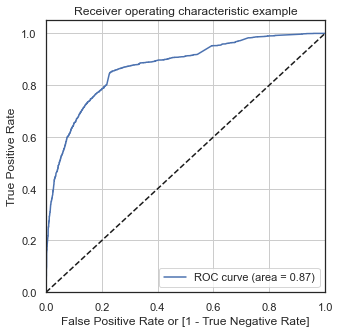

In [229]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 88% of the total area.

### Finding optimal probability cutoff point

In [230]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
1871,0,0.137955,1871,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.268979,6795,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.160952,3516,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.781693,8105,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
3934,0,0.098887,3934,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.95. We will do this by finding **'Accuracy'**, **'Sensitivity'** and **'Specificity'** for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [231]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs
# importing necessary library
from sklearn.metrics import confusion_matrix
# Creating a dataframe to store all the values to be created
df_cutoffs=pd.DataFrame(columns=['cut_off_Probability','Accuracy','Sensitvity','Specificity'])
# from 0 to 0.95 with set size 0.05
var=[float(5*x)/100 for x in range(20)]   
for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

      cut_off_Probability  Accuracy  Sensitvity  Specificity
0.00                 0.00  0.381262    1.000000     0.000000
0.05                 0.05  0.491651    0.990673     0.184158
0.10                 0.10  0.560451    0.971208     0.307346
0.15                 0.15  0.664657    0.909570     0.513743
0.20                 0.20  0.749382    0.880779     0.668416
0.25                 0.25  0.787724    0.862125     0.741879
0.30                 0.30  0.800093    0.845904     0.771864
0.35                 0.35  0.799165    0.770073     0.817091
0.40                 0.40  0.806741    0.729521     0.854323
0.45                 0.45  0.807050    0.685726     0.881809
0.50                 0.50  0.804113    0.646391     0.901299
0.55                 0.55  0.800557    0.611922     0.916792
0.60                 0.60  0.793290    0.570154     0.930785
0.65                 0.65  0.785869    0.526358     0.945777
0.70                 0.70  0.775974    0.482157     0.957021
0.75                 0.7

As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.95.
Out of this we have to choose one as a cutoff point and it is **probability cutoff = 0.35** because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

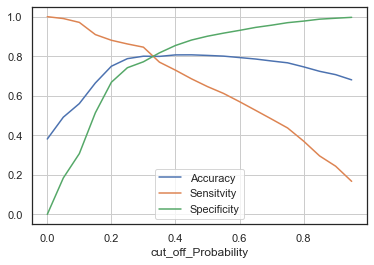

In [232]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.95).

df_cutoffs.plot.line(x='cut_off_Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.grid()
plt.show()

From the above curve, 0.35 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.35 hence final cutoff we choose is **0.35**. Also we can see that there is a trade off between sensitivity and specificity.

In [233]:
# Predicting the outcomes with probability cutoff as 0.35 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.35 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Predicted
1871,0,0.137955,1871,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.268979,6795,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.160952,3516,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.781693,8105,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
3934,0,0.098887,3934,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned. 

In [234]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3270,  732],
       [ 567, 1899]], dtype=int64)

In [235]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7217787913340935
Recall 0.7700729927007299


Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 72% approximately and recall  percentage is 77%
- This means we have very good model which explains relevancy of 72% and true relevant results about 77%.

**As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.**

### Precision and Recall trade-off

As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two.
Let's check that in below graph.

In [236]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

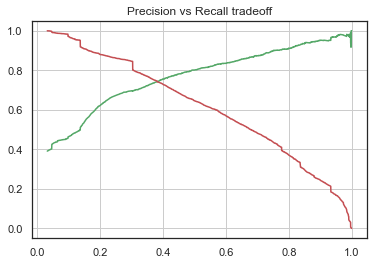

In [237]:
# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.grid()
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.4**

# Step 7: Making predictions using the final model

### Scaling the test dataset

In [238]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [239]:
# Predicting the test dataset with our final model

test_cols=X_train_8.columns             # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
y_pred_test=reg8.predict(X_test_final)       # Predicting the final test set

### Model Evaluation

In [240]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.711188,4269
2376,1,0.932743,2376
7766,1,0.889923,7766
9199,0,0.047443,9199
4359,1,0.835409,4359


In [241]:
# Predicting the outcomes with probability cutoff as 0.35 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.35 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.711188,4269,1
2376,1,0.932743,2376,1
7766,1,0.889923,7766,1
9199,0,0.047443,9199,0
4359,1,0.835409,4359,1


In [242]:
# Checking the accuracy of the test dataset.
from sklearn import metrics    # Imprting metrics from sklearn
print('Accuracy score in test dataset :', round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),3))   # Printing the score

Accuracy score in test dataset : 0.802


In [243]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted).ravel()
sensitivity = tp / (fn+tp)
specificity = tn / (tn+fp)
print('Sensitivity in test dataset:', round(sensitivity,2))   # Printing the sensitivity
print('Specificity in test dataset:', round(specificity,2))      # Printing specificity

Sensitivity in test dataset: 0.77
Specificity in test dataset: 0.82


In [244]:
mat = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)


<AxesSubplot:>

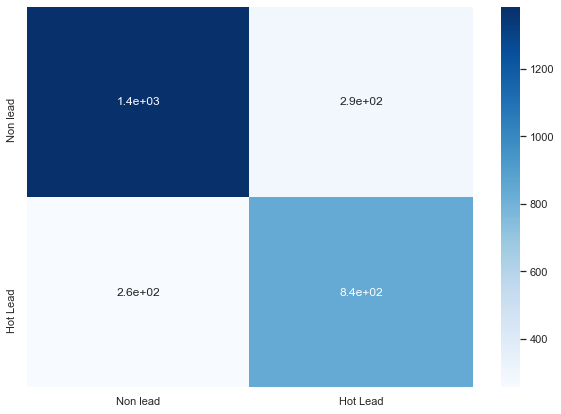

In [245]:
classes = ["Non lead", "Hot Lead"]
df_cm = pd.DataFrame(mat, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap=plt.cm.Blues)

<AxesSubplot:>

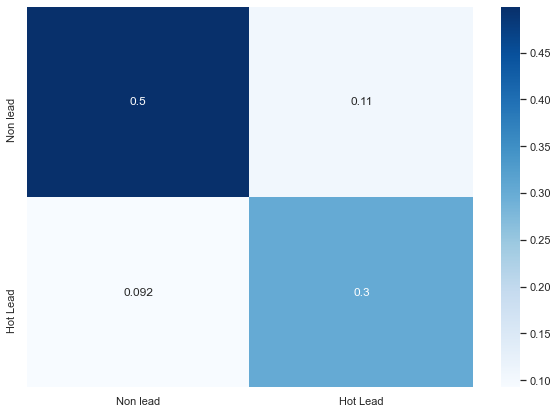

In [246]:
classes = ["Non lead", "Hot Lead"]
df_cm = pd.DataFrame(mat/sum(sum(mat)), index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap=plt.cm.Blues)

In [247]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn
print('Precision score in test dataset:', round(precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),2))   # Printing the precision score
print('Recall score in test dataset:', round(recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted),2) )     # Printing the recall score

Precision score in test dataset: 0.74
Recall score in test dataset: 0.77


### Lead Score assigning

In [248]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=lead_score2.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.711188,4269,1,0,71
2376,1,0.932743,2376,1,0,93
7766,1,0.889923,7766,1,0,89
9199,0,0.047443,9199,0,0,5
4359,1,0.835409,4359,1,0,84


# Conclusion

Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Total Time spent on website**
    - **Last Notable Activity_modified**
    - **Lead Origin_Lead Add Form** and
    - **What is your current occupation_Working Professional**

# Alternative models

In [249]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_alt_model, y_alt_model, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.813 (0.015)


In [250]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_alt_model, y_alt_model, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.777 (0.012)
